# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy.stats import pearsonr, spearmanr, f_oneway, chi2_contingency
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# LOADING DATA

## Data Source
[Students Performance Dataset (Kaggle)](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)


In [2]:

file_path = r"C:\Users\muham\OneDrive\Desktop\Krish Naik\notebooks\data\StudentsPerformance.csv"

target_columns = ['math score', 'reading score', 'writing score']



In [3]:
df = pd.read_csv(file_path)
print(f"Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loaded dataset with 1000 rows and 8 columns.

Memory usage: 0.33 MB


In [4]:
display(df.head())
print("\nColumn names:")
print(df.columns.tolist())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Column names:
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


# DATA TYPES

In [5]:
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [6]:
print("\n" + "="*20 + " Datetime Features " + "="*20)
# Attempt to convert likely date columns
date_cols = []
for col in df.columns:
    if 'date' in col.lower():
        try:
            df[col] = pd.to_datetime(df[col])
            date_cols.append(col)
        except Exception:
            continue

for col in df.select_dtypes(include=['datetime64']).columns:
    print(f"Extracting from {col}: year, month, day, weekday.")
    df[f"{col}_year"] = df[col].dt.year
    df[f"{col}_month"] = df[col].dt.month
    df[f"{col}_day"] = df[col].dt.day
    df[f"{col}_weekday"] = df[col].dt.weekday


==================== Datetime Features ====================


# MISSING VALUE ANALYSIS

In [7]:


print("\n" + "="*20 + "  Missing Values " + "="*20)
missing = df.isnull().mean() * 100
print(missing.sort_values(ascending=False))
for col, pct in missing.items():
    if pct == 0:
        rec = "No action needed."
    elif pct < 5:
        rec = "Recommend dropping missing rows."
    elif pct < 30:
        rec = ("Impute values: numeric → median, categorical → mode, "
               "or create an 'Unknown' category.")
    else:
        rec = "Consider dropping this column."
    print(f"{col}: {pct:.1f}% missing → {rec}")


====================  Missing Values ====================
gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64
gender: 0.0% missing → No action needed.
race/ethnicity: 0.0% missing → No action needed.
parental level of education: 0.0% missing → No action needed.
lunch: 0.0% missing → No action needed.
test preparation course: 0.0% missing → No action needed.
math score: 0.0% missing → No action needed.
reading score: 0.0% missing → No action needed.
writing score: 0.0% missing → No action needed.


# DUPLICATES ROWS

In [8]:


print("\n" + "="*20 + " Duplicate Rows " + "="*20)
dup_count = df.duplicated().sum()
print(f"Found {dup_count} exact duplicate rows.")
if dup_count > 0:
    print("Recommend dropping duplicates: df = df.drop_duplicates()")


==================== Duplicate Rows ====================
Found 0 exact duplicate rows.


# DESCRIPTIVE STATISTICS


==================== 6. Descriptive Statistics ====================
Numeric:


,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0



Categorical:

gender distribution:
gender
female    518
male      482
Name: count, dtype: int64


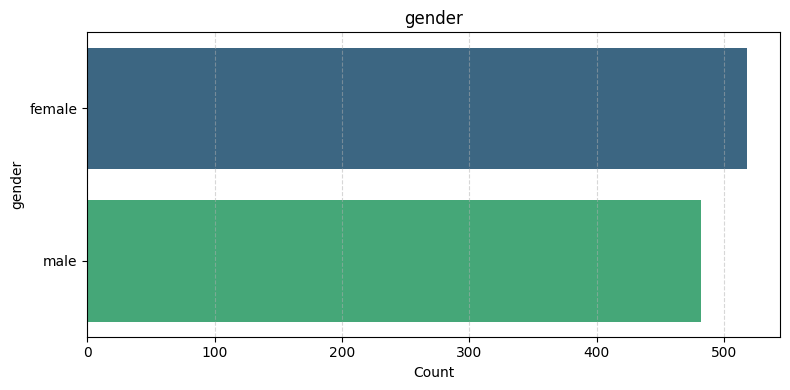


race/ethnicity distribution:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


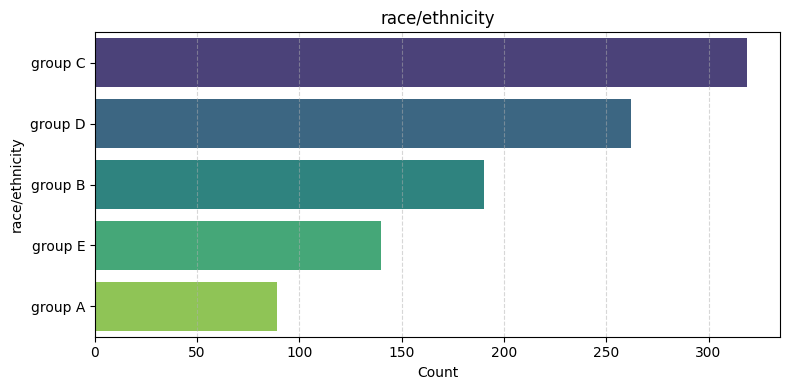


parental level of education distribution:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


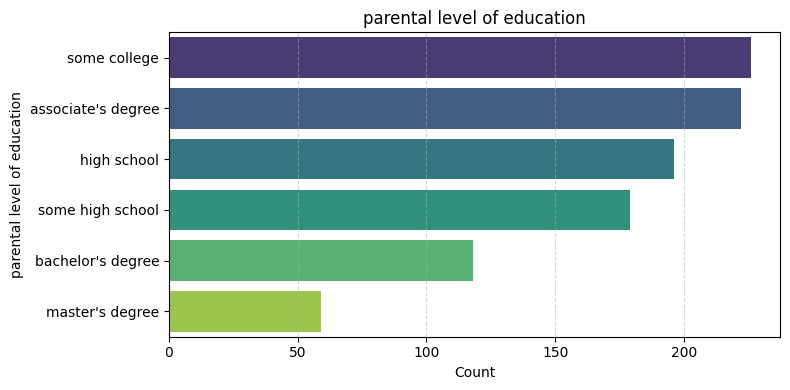


lunch distribution:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64


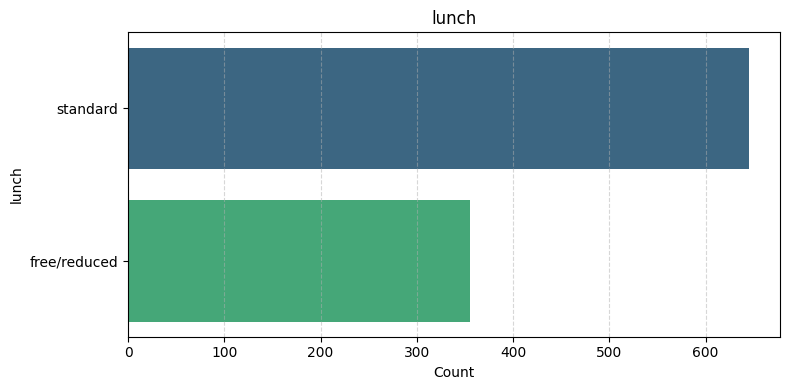


test preparation course distribution:
test preparation course
none         642
completed    358
Name: count, dtype: int64


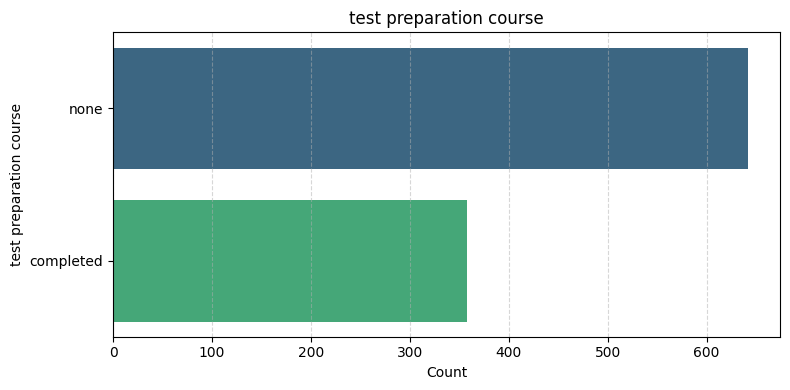

In [9]:
print("\n" + "="*20 + " 6. Descriptive Statistics " + "="*20)
print("Numeric:")
display(df.describe().T)

print("\nCategorical:")
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    counts = df[col].value_counts(dropna=False).head(10)
    print(f"\n{col} distribution:\n{counts}")
    # Visual summary for categorical columns
    plt.figure(figsize=(8, 4))
    sns.barplot(x=counts.values, y=counts.index, hue=counts.index, dodge=False, palette="viridis", legend=False)
    plt.title(f"{col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.show()


#  Univariate Analysis


==================== Univariate Analysis ====================

Histogram for math score:


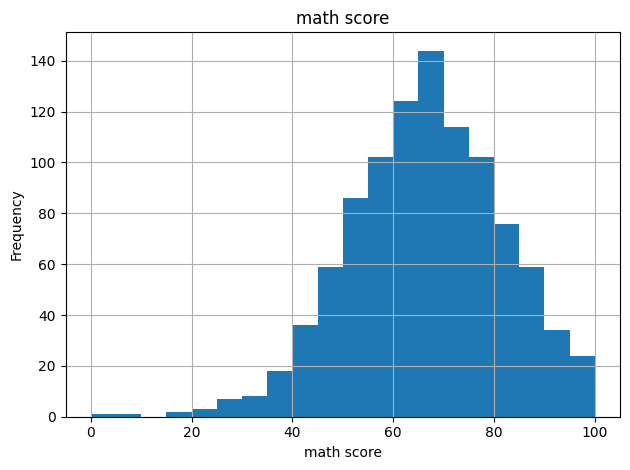


Histogram for reading score:


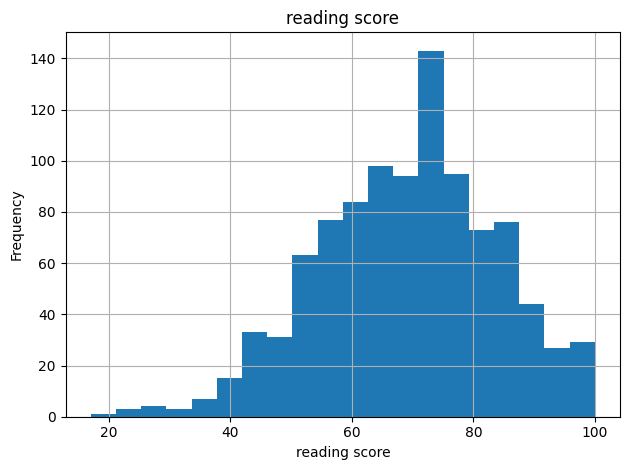


Histogram for writing score:


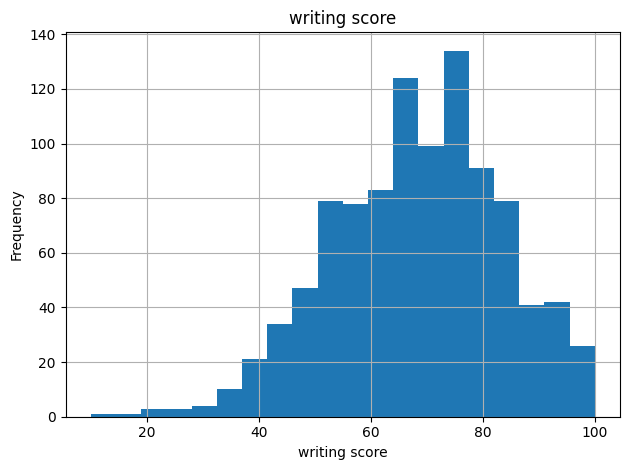

In [10]:

print("\n" + "="*20 + " Univariate Analysis " + "="*20)
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    print(f"\nHistogram for {col}:")
    df[col].hist(bins=20, grid=False)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.grid(True)
    plt.show()



# OUTLIER DETECTION


==================== Outlier Detection ====================
math score: 8 rows (0.8%) outliers detected.


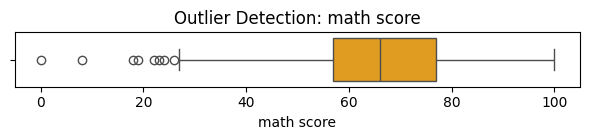

reading score: 6 rows (0.6%) outliers detected.


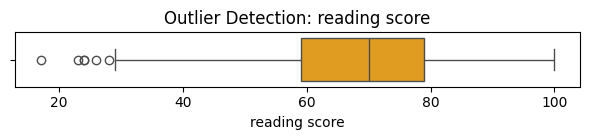

writing score: 5 rows (0.5%) outliers detected.


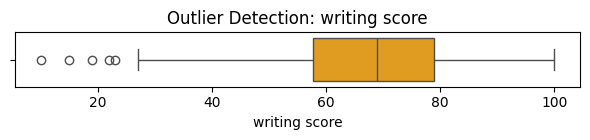

In [11]:
print("\n" + "="*20 + " Outlier Detection " + "="*20)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    pct = len(outliers) / len(df) * 100
    print(f"{col}: {len(outliers)} rows ({pct:.1f}%) outliers detected.")
    if pct > 1:
        print("  → Consider capping or investigating outliers.")
    # Boxplot visualization
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col], color="orange")
    plt.title(f"Outlier Detection: {col}")
    plt.tight_layout()
    plt.show()

# CORRELATION MATRIX


==================== Correlation Matrix ====================


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


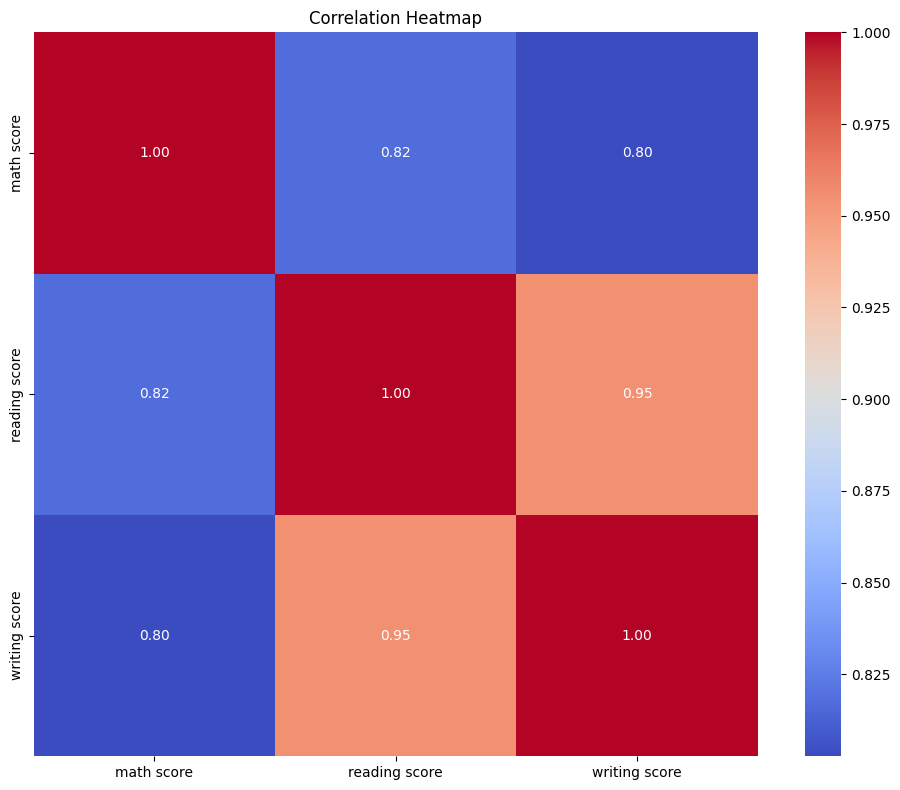

In [12]:
print("\n" + "="*20 + " Correlation Matrix " + "="*20)
corr = df[num_cols].corr()
display(corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# TARGET VARIABLE ANALYSIS


==================== Target Analysis ====================

--- math score ---
Distribution of numeric target 'math score':


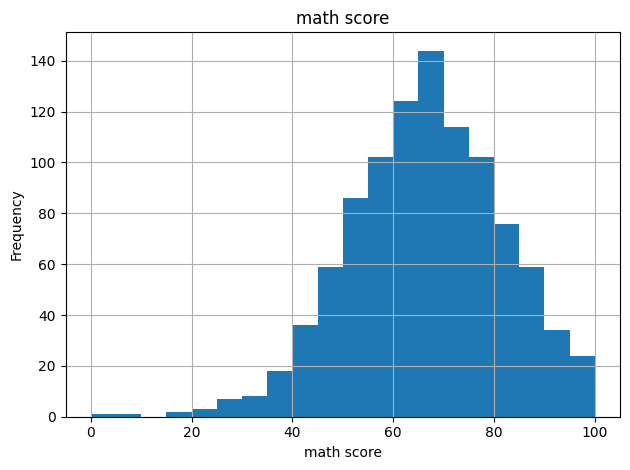


--- reading score ---
Distribution of numeric target 'reading score':


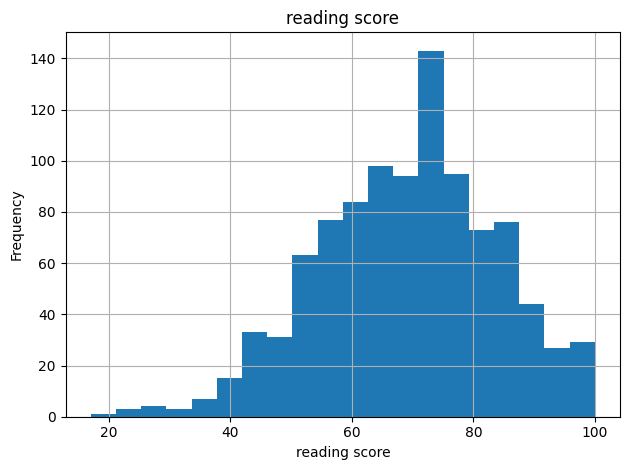


--- writing score ---
Distribution of numeric target 'writing score':


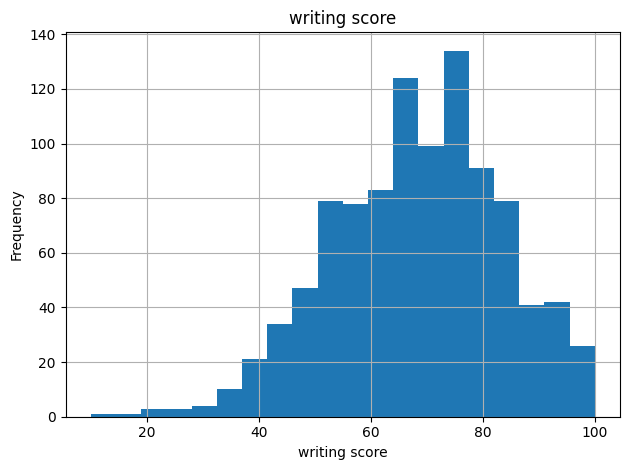

In [13]:
print("\n" + "="*20 + " Target Analysis " + "="*20)
for target_column in target_columns:
    if target_column not in df.columns:
        print(f"{target_column} not found in dataset. Skipping.")
        continue

    print(f"\n--- {target_column} ---")
    if df[target_column].dtype in [np.int64, np.float64]:
        print(f"Distribution of numeric target '{target_column}':")
        df[target_column].hist(bins=20)
        plt.title(target_column)
        plt.xlabel(target_column)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.grid(True)
        plt.show()
    else:
        print(f"Value counts for categorical target '{target_column}':")
        print(df[target_column].value_counts())

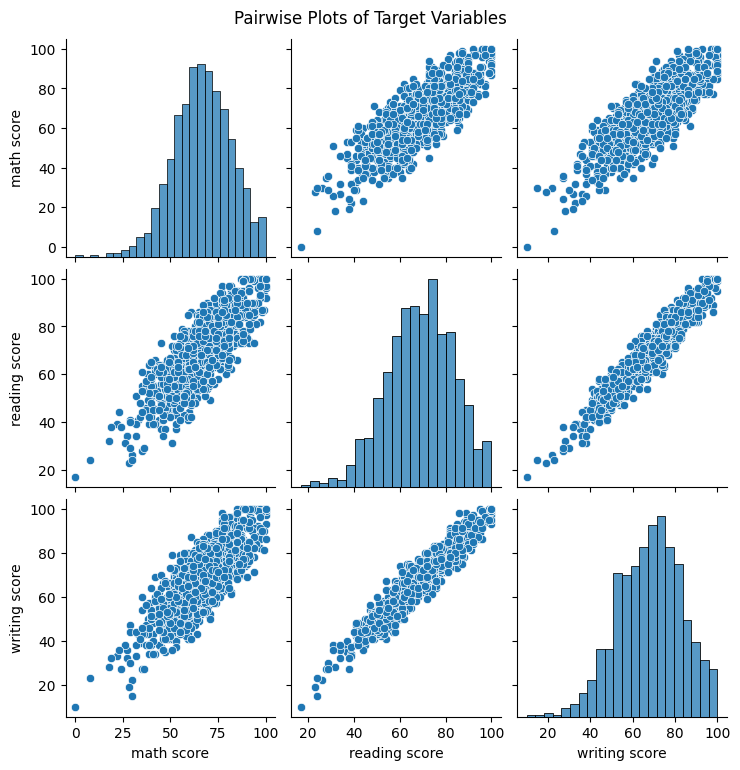

In [14]:
sns.pairplot(df[target_columns])
plt.suptitle("Pairwise Plots of Target Variables", y=1.02)
plt.show()

# BIVARIATE ANALYSIS


====================  Bivariate Analysis ====================
→ 'gender' influences 'math score'; 'male' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


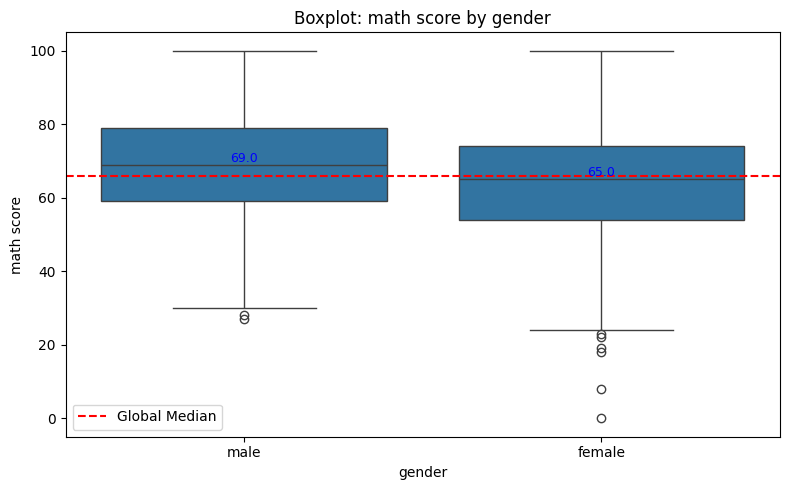

→ 'gender' influences 'reading score'; 'female' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


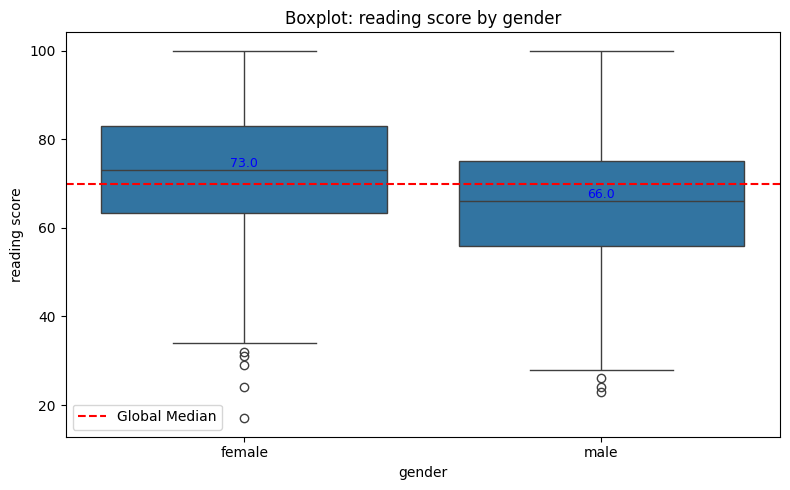

→ 'gender' influences 'writing score'; 'female' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


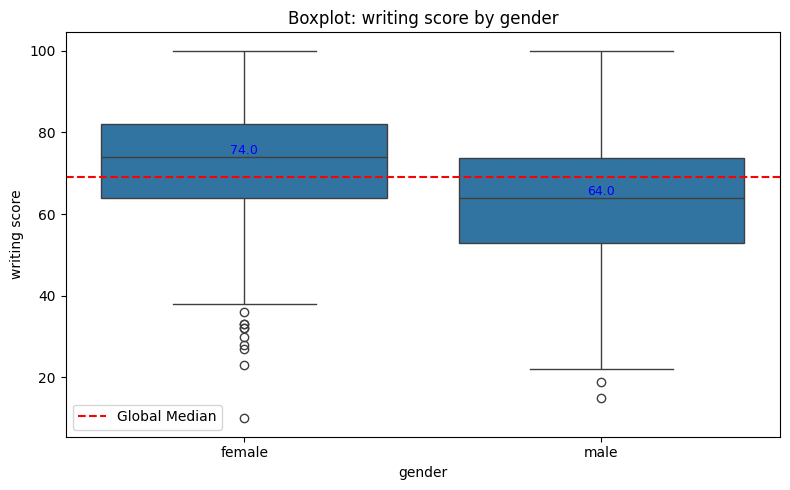

→ 'race/ethnicity' influences 'math score'; 'group E' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


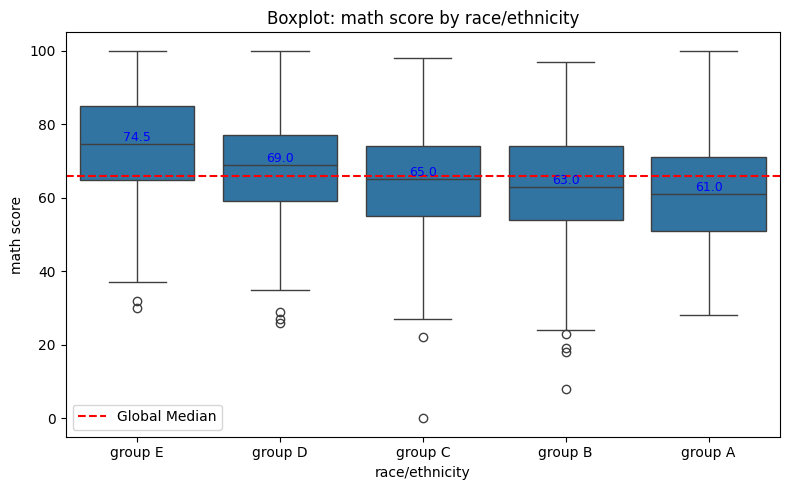

→ 'race/ethnicity' influences 'reading score'; 'group E' has the highest median value.
ANOVA p-value: 0.0002 → Significant
Kruskal-Wallis p-value: 0.0003 → Significant


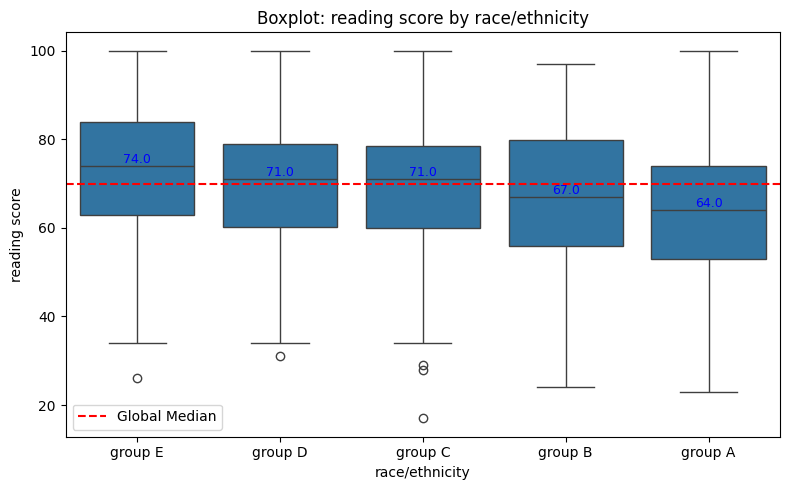

→ 'race/ethnicity' influences 'writing score'; 'group E' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


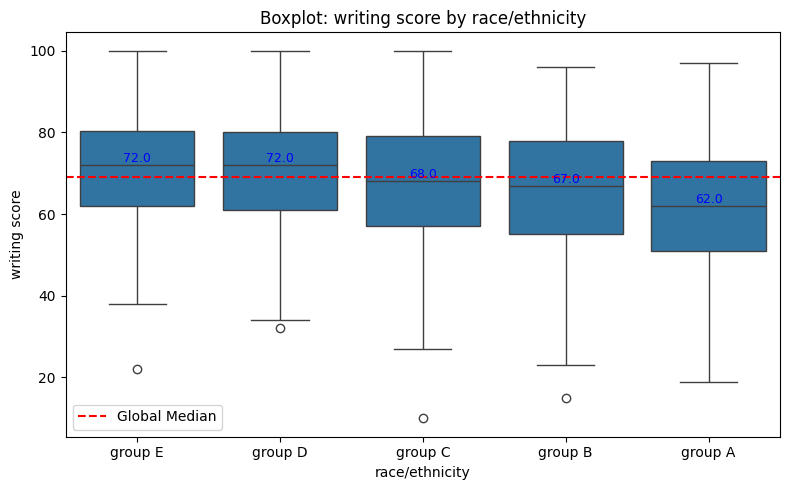

→ 'parental level of education' influences 'math score'; 'master's degree' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0001 → Significant


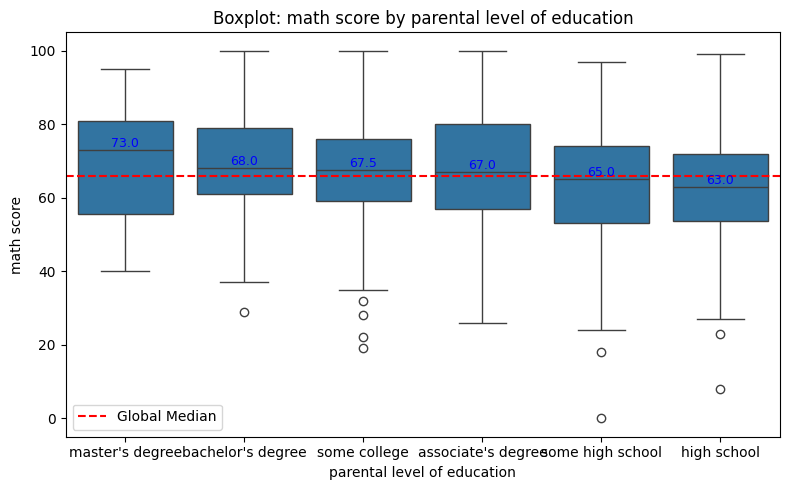

→ 'parental level of education' influences 'reading score'; 'master's degree' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


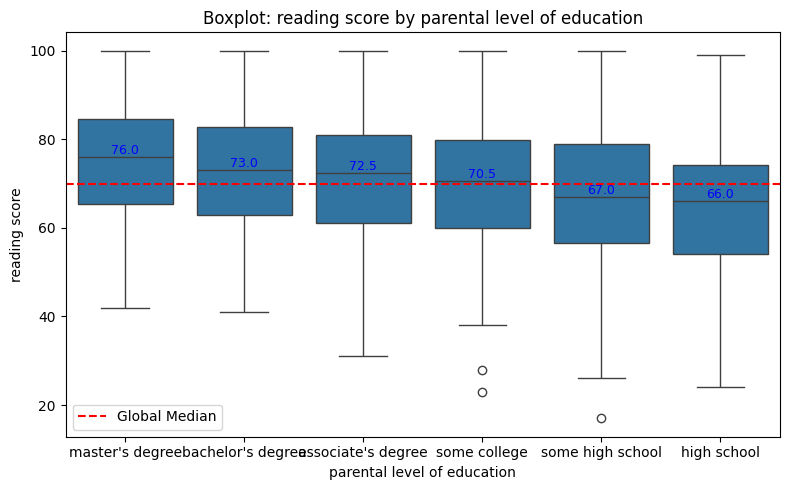

→ 'parental level of education' influences 'writing score'; 'master's degree' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


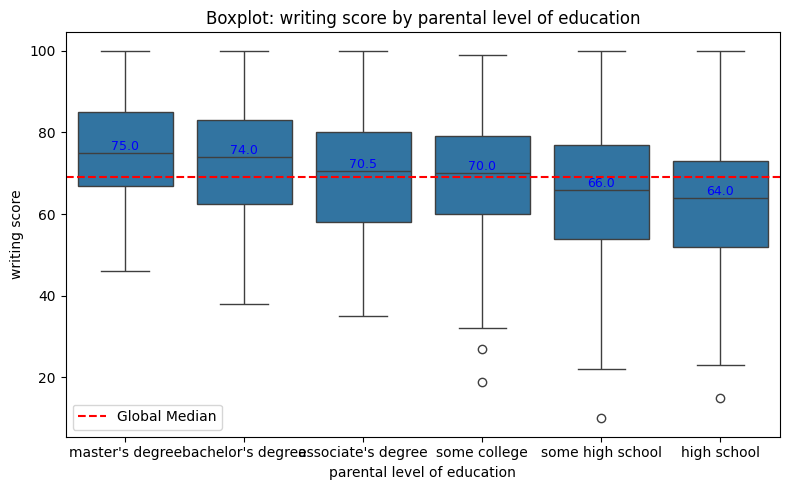

→ 'lunch' influences 'math score'; 'standard' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


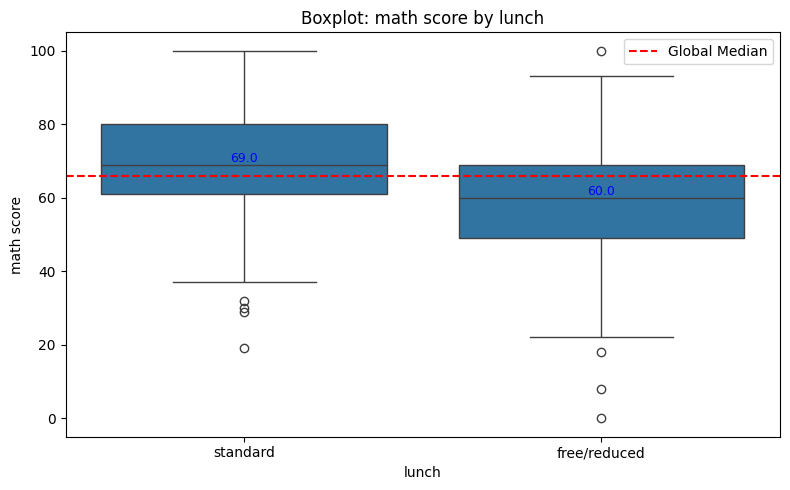

→ 'lunch' influences 'reading score'; 'standard' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


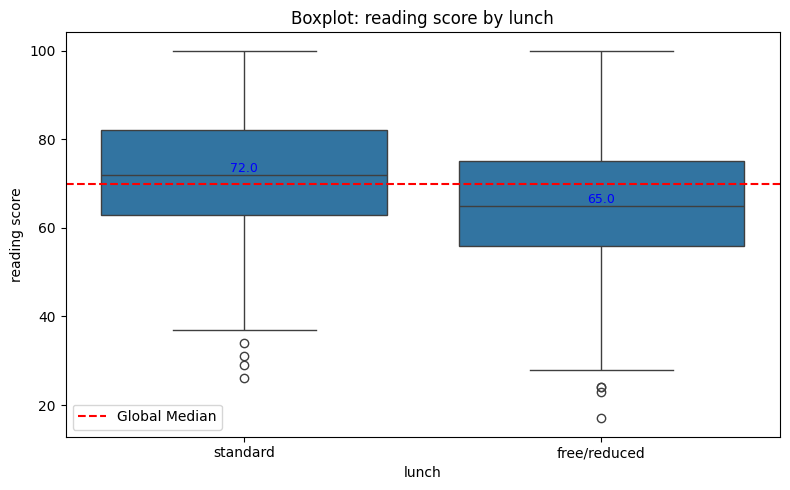

→ 'lunch' influences 'writing score'; 'standard' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


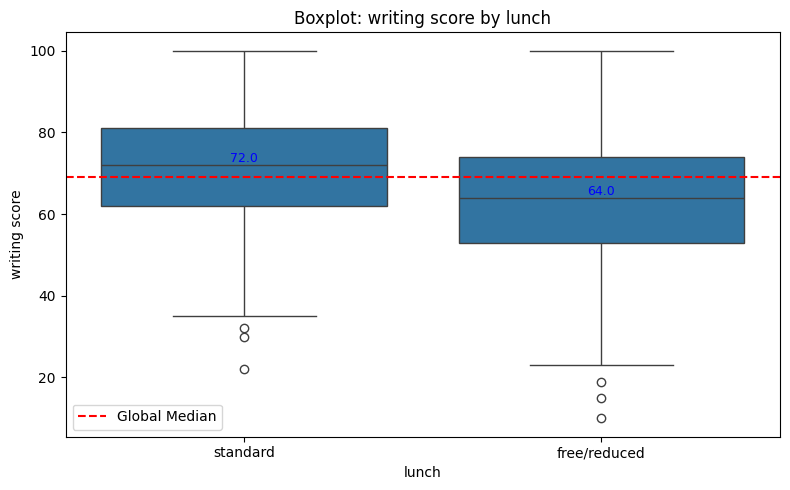

→ 'test preparation course' influences 'math score'; 'completed' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


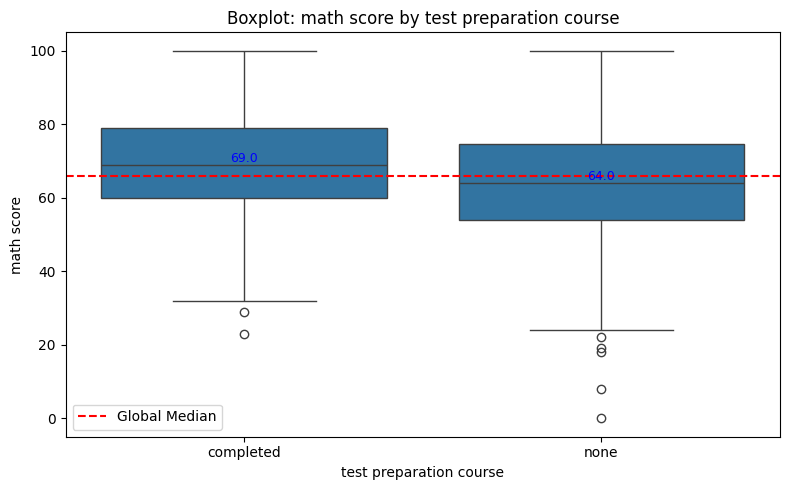

→ 'test preparation course' influences 'reading score'; 'completed' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


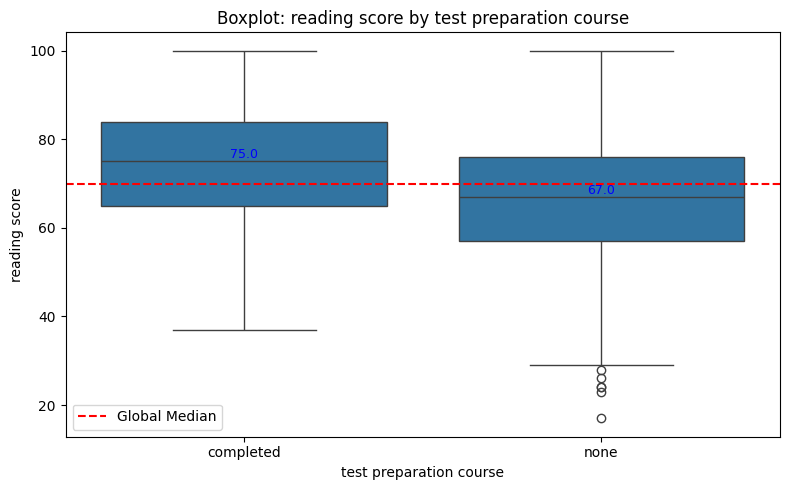

→ 'test preparation course' influences 'writing score'; 'completed' has the highest median value.
ANOVA p-value: 0.0000 → Significant
Kruskal-Wallis p-value: 0.0000 → Significant


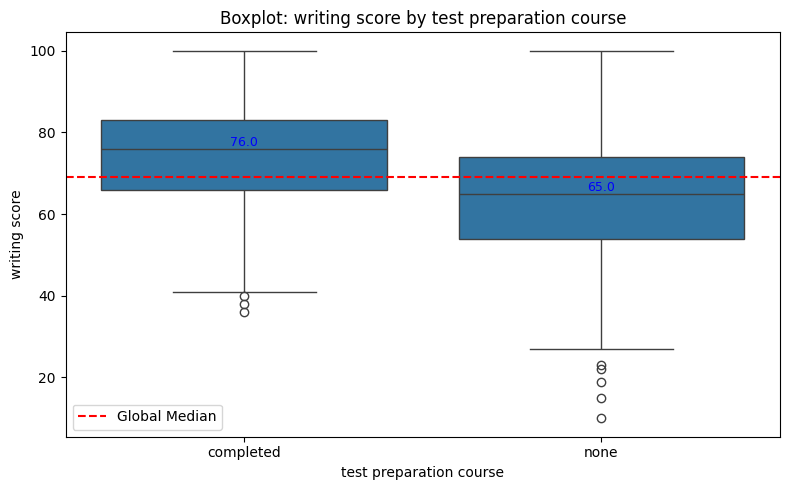

Summary of statistical tests is shown below.


,Categorical,Numeric,Best Category,ANOVA p,ANOVA Sig,Kruskal p,Kruskal Sig
0,gender,math score,male,0.0000,Yes,0.0000,Yes
1,gender,reading score,female,0.0000,Yes,0.0000,Yes
2,gender,writing score,female,0.0000,Yes,0.0000,Yes
3,race/ethnicity,math score,group E,0.0000,Yes,0.0000,Yes
4,race/ethnicity,reading score,group E,0.0002,Yes,0.0003,Yes
5,race/ethnicity,writing score,group E,0.0000,Yes,0.0000,Yes
6,parental level of education,math score,master's degree,0.0000,Yes,0.0001,Yes
7,parental level of education,reading score,master's degree,0.0000,Yes,0.0000,Yes
8,parental level of education,writing score,master's degree,0.0000,Yes,0.0000,Yes
9,lunch,math score,standard,0.0000,Yes,0.0000,Yes


In [15]:
print("\n" + "="*20 + "  Bivariate Analysis " + "="*20)
results = []

for col1 in df.columns:
    for col2 in df.columns:
        if col1 == col2:
            continue

        dtype1 = df[col1].dtype
        dtype2 = df[col2].dtype

        if (isinstance(dtype1, pd.CategoricalDtype) or df[col1].nunique() < 10) and pd.api.types.is_numeric_dtype(dtype2):
            plt.figure(figsize=(8, 5))
            group_medians = df.groupby(col1)[col2].median().sort_values(ascending=False)
            ordered_categories = group_medians.index
            sns.boxplot(x=col1, y=col2, data=df, order=ordered_categories)

            global_median = df[col2].median()
            plt.axhline(global_median, color='red', linestyle='--', label='Global Median')

            for i, cat in enumerate(ordered_categories):
                median_val = group_medians[cat]
                plt.text(i, median_val, f"{median_val:.1f}",
                         ha='center', va='bottom', fontsize=9, color='blue')

            best_cat = group_medians.idxmax()
            print(f"→ '{col1}' influences '{col2}'; '{best_cat}' has the highest median value.")

            # Statistical tests
            samples = [df[df[col1] == cat][col2].dropna() for cat in ordered_categories]
            if len(samples) > 1:
                f_stat, p_anova = stats.f_oneway(*samples)
                h_stat, p_kruskal = stats.kruskal(*samples)
                print(f"ANOVA p-value: {p_anova:.4f} → {'Significant' if p_anova < 0.05 else 'Not significant'}")
                print(f"Kruskal-Wallis p-value: {p_kruskal:.4f} → {'Significant' if p_kruskal < 0.05 else 'Not significant'}")
                results.append({
                    'Categorical': col1,
                    'Numeric': col2,
                    'Best Category': best_cat,
                    'ANOVA p': round(p_anova, 4),
                    'ANOVA Sig': 'Yes' if p_anova < 0.05 else 'No',
                    'Kruskal p': round(p_kruskal, 4),
                    'Kruskal Sig': 'Yes' if p_kruskal < 0.05 else 'No'
                })

            plt.title(f"Boxplot: {col2} by {col1}")
            plt.legend()
            plt.tight_layout()
            plt.show()

# Export summary table
if results:
    print("Summary of statistical tests is shown below.")
    summary_df = pd.DataFrame(results)
    display(summary_df)
    # summary_df.to_csv("bivariate_statistical_summary.csv", index=False)
    
else:
    print("\nNo valid bivariate comparisons found for statistical testing.")